# Classification - Breast Cancer Wisconsin (Diagnostic)

[UCI - Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and
     prognosis via linear programming. Operations Research, 43(4), pages 570-577,
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994)
     163-171.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [59]:
df=pd.read_csv("cancer_classification.csv")

In [60]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory Data Analysis

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [62]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Check whether it is well balanced data or not


In [63]:
df['benign_0__mal_1'].value_counts()

benign_0__mal_1
1    357
0    212
Name: count, dtype: int64

C:\Users\essam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\essam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


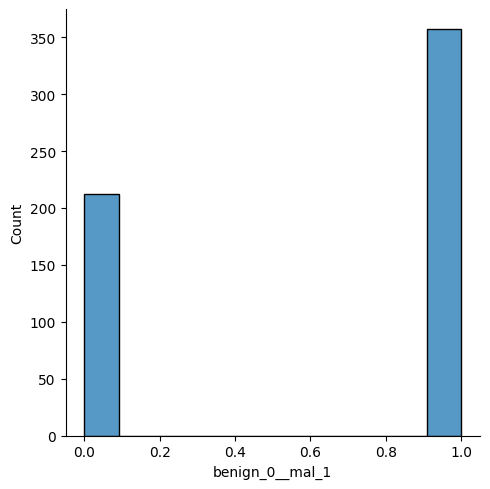

In [64]:
sns.displot(df['benign_0__mal_1'])

Although cases with 1 is more than 0 cases, the difference is not that extreme.

## Check correlation

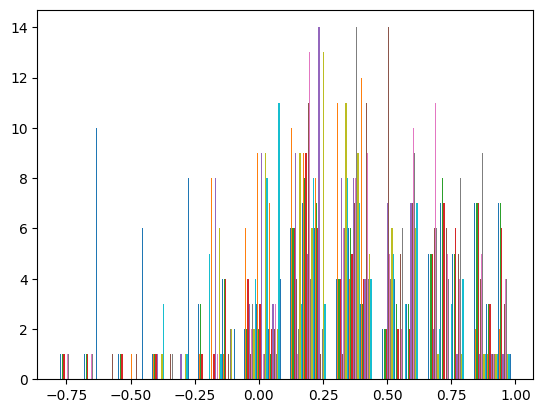

In [65]:
plt.hist(df.corr())
plt.show()

# Train Test Split


In [66]:
y=df['benign_0__mal_1']
x=df.drop(columns=['benign_0__mal_1'],axis=1)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# Scaling Data

In [68]:
# Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [69]:
x_trains=scale.fit_transform(x_train)
x_tests=scale.transform(x_test)


# Model Building

## For a binary classification problem
`model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])`

In [70]:
model=Sequential()

In [71]:
model.add(Dense(units=31,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## Example One: Choosing too many epochs and overfitting!

In [72]:
# # fit the model
# model.fit(x=x_trains,y=y_train,batch_size=128,epochs=100,validation_data=[x_tests,y_test],verbose=1)

## Training the Model


In [73]:
# fit the model
model.fit(x=x_trains,y=y_train,batch_size=256,epochs=100,validation_data=[x_tests,y_test],verbose=1)

Epoch 1/100


2/2 [==============================] - 1s 136ms/step - loss: 0.6736 - accuracy: 0.7462 - val_loss: 0.5860 - val_accuracy: 0.8596
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 0.3459 - accuracy: 0.8769 - val_loss: 0.4798 - val_accuracy: 0.8889
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2353 - accuracy: 0.9221 - val_loss: 0.4229 - val_accuracy: 0.9064
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.1879 - accuracy: 0.9472 - val_loss: 0.3861 - val_accuracy: 0.9240
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1573 - accuracy: 0.9523 - val_loss: 0.3594 - val_accuracy: 0.9240
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.1345 - accuracy: 0.9648 - val_loss: 0.3442 - val_accuracy: 0.9240
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.1174 - accuracy: 0.9648 - val_loss: 0.3303 - val_accuracy: 0.9240
Epoch 8/100
2/2 [==============

## Check history of Training

In [74]:
losses=pd.DataFrame(model.history.history)
losses.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.673627,0.746231,0.586017,0.859649
1,0.345923,0.876884,0.479847,0.888889
2,0.235301,0.922111,0.422868,0.906433
3,0.187893,0.947236,0.386098,0.923977
4,0.157322,0.952261,0.359388,0.923977


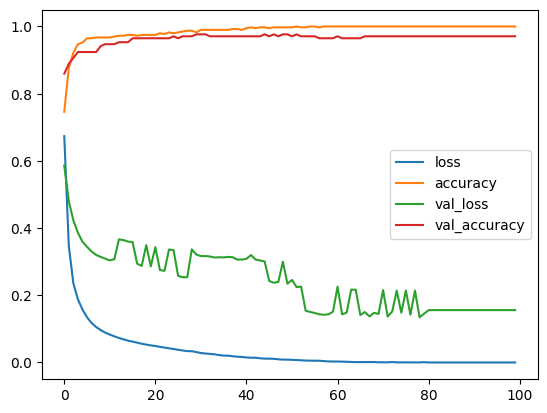

In [75]:
losses.plot();

We can see from the chart that our model is definitely OVERFITTING because `val_loss` (orange line) suddenly spikes up after a certain epochs.

val_loss is getting wrose and wrose after a certain point in time.

To avoid this, we can put Early Stopping.

# Model Building (with Early Stopping)


## Example Two: Early Stopping

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

## Early stopping

Stop training when a monitored quantity has stopped improving.

Parameters:

* `monitor`: Quantity to be monitored.
* `min_delta`: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
* `patience`: Number of epochs with no improvement after which training will be stopped.
* `verbose`: verbosity mode.
* `mode`: One of `{"auto", "min", "max"}`.
  * In `min` mode, training will stop when the quantity monitored has stopped decreasing;
  * in `max` mode it will stop when the quantitymonitored has stopped increasing;
  * in `auto`mode, the direction is automatically inferred from the name of the monitored quantity.

In [77]:
early_stopping_monitor = EarlyStopping(patience=18,
                                       monitor='val_loss',verbose=1,mode='min' )

## Model Training with Early Stopping

In [78]:
model.fit(x=x_trains,y=y_train,batch_size=256,epochs=100,validation_data=[x_tests,y_test],verbose=1,callbacks=[early_stopping_monitor])

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

2/2 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9708
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9708
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9708
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9708
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9708
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9708
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9708
Epoc

Now we can see that because of Early Stopping, the model traning got stopped once there is no improvement in training (after 87 epoch).


## Check history of Training (with Early Stopping)

In [79]:
losses=pd.DataFrame(model.history.history)
losses.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.0,1.0,0.155874,0.97076
1,0.0,1.0,0.155874,0.97076
2,0.0,1.0,0.155874,0.97076
3,0.0,1.0,0.155874,0.97076
4,0.0,1.0,0.155874,0.97076


<Axes: >

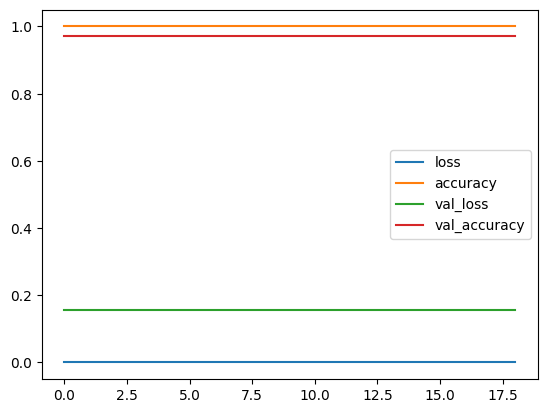

In [80]:
losses.plot()

# Model Building (with Adding in DropOut Layers)
* Turn off % of neurons randomly
* `rate`: 0 - 1 (percentage of neurons to be turned off randomly while training on each epoch)

## Example Three: Adding in DropOut Layers

In [81]:
from keras.layers import Dense, Dropout
# Dropout with a rate of 0.2 (20% of neurons will be turned off randomly)
# Add a dense layer with ReLU activation and dropout
model.add(Dense(units=31, activation='relu'))


model.add(Dense(units=15, activation='relu'))


model.add(Dense(units=15, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(rate=0.2))

# Add the output layer
model.add(Dense(units=1))

In [82]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [83]:
model.fit(x=x_train, y=y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test), verbose=1)


Epoch 1/100
2/2 [==============================] - 1s 177ms/step - loss: 7.8803 - accuracy: 0.3568 - val_loss: 9.4715 - val_accuracy: 0.3860
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 7.5001 - accuracy: 0.3518 - val_loss: 2.5462 - val_accuracy: 0.3860
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 6.2715 - accuracy: 0.3593 - val_loss: 1.6471 - val_accuracy: 0.3392
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 4.3743 - accuracy: 0.3116 - val_loss: 1.4783 - val_accuracy: 0.3450
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 2.4016 - accuracy: 0.3769 - val_loss: 1.4996 - val_accuracy: 0.3684
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 2.3179 - accuracy: 0.3719 - val_loss: 1.3438 - val_accuracy: 0.3860
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 1.5413 - accuracy: 0.4397 - val_loss: 1.3674 - val_accuracy: 0.4444
Epoch 8/100
2/2 [==

## Check history of losses

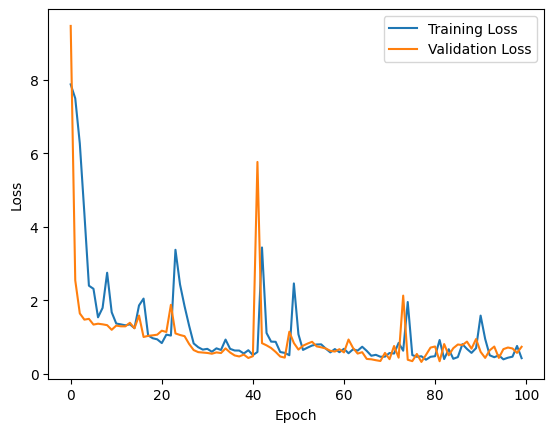

In [84]:
training_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']

# Plot the losses
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can see that both `loss` and `val_loss` are decreasing almost together and flattening out. This is a great improvment from our original model.


# Model Evaluation

In [85]:
# Evaluate the trained model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


6/6 [==============================] - 0s 2ms/step - loss: 0.7395 - accuracy: 0.8596
Test Loss: 0.7394601702690125
Test Accuracy: 0.859649121761322
